Current working directory: /Users/abhi/shape_color_cond2_shape_given_color
Available epochs: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150]
Showing real examples:


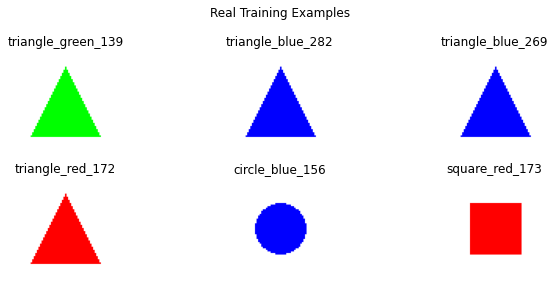

Showing latest generated samples:


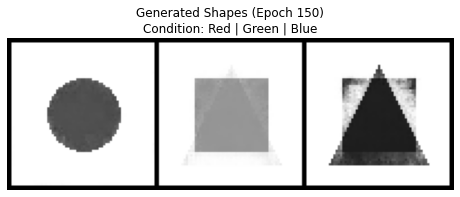

In [12]:
import os

# Set working directory to project root
os.chdir("/Users/abhi/shape_color_cond2_shape_given_color")  # <-- Update to your project root
print("Current working directory:", os.getcwd())

from PIL import Image
import matplotlib.pyplot as plt

# Paths
samples_dir = "samples/cond2"
real_data_dir = "data/toy_dataset/train"

# Collect epochs
epochs = sorted([
    int(f.split("epoch")[1].split(".")[0])
    for f in os.listdir(samples_dir)
    if f.startswith("generated_epoch")
])

print("Available epochs:", epochs)

# Display generated samples
def show_generated(epoch):
    img_path = os.path.join(samples_dir, f"generated_epoch{epoch}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(8, 3))
        plt.imshow(img)
        plt.title(f"Generated Shapes (Epoch {epoch})\nCondition: Red | Green | Blue")
        plt.axis("off")
        plt.show()
    else:
        print(f"No generated file for epoch {epoch}")

# Display real examples for comparison
def show_real_examples():
    real_imgs = [f for f in os.listdir(real_data_dir) if f.endswith(".png")]
    selected = real_imgs[:6]  # Show first 6 samples
    plt.figure(figsize=(10, 4))
    for i, fname in enumerate(selected):
        img_path = os.path.join(real_data_dir, fname)
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(fname.split(".")[0])
        plt.axis("off")
    plt.suptitle("Real Training Examples")
    plt.tight_layout()
    plt.show()

# Show real vs generated
print("Showing real examples:")
show_real_examples()

print("Showing latest generated samples:")
if epochs:
    show_generated(epochs[-1])
else:
    print("No generated images found.")


/var/folders/lk/3_5wq3hd42sftzx4ssd207_80000gp/T/ipykernel_63624/2727446064.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_ckpt, map_loca

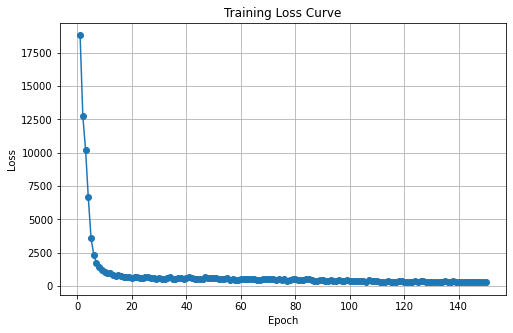

Showing final generated output:


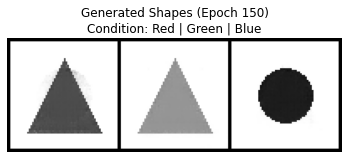

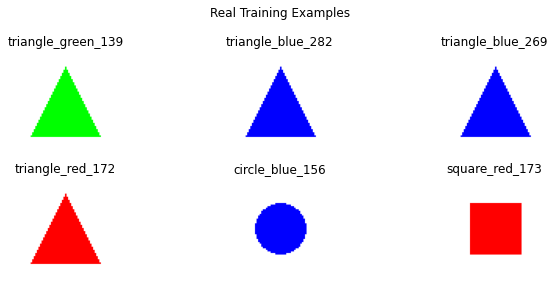

In [13]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Paths
samples_dir = "samples/cond2_improved"
real_data_dir = "data/toy_dataset/train"
model_ckpt = "models/cond_shape_given_color_improved.pth"

# Load Loss History
checkpoint = torch.load(model_ckpt, map_location="cpu")
loss_history = checkpoint["loss_history"]

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history)+1), loss_history, marker="o")
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

#  Shows Generated Samples from Last Epoch
epochs = sorted([
    int(f.split("epoch")[1].split(".")[0])
    for f in os.listdir(samples_dir)
    if f.startswith("generated_epoch")
])

def show_generated(epoch):
    img_path = os.path.join(samples_dir, f"generated_epoch{epoch}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(6, 3))
        plt.imshow(img)
        plt.title(f"Generated Shapes (Epoch {epoch})\nCondition: Red | Green | Blue")
        plt.axis("off")
        plt.show()
    else:
        print(f"No generated image for epoch {epoch}")

print("Showing final generated output:")
if epochs:
    show_generated(epochs[-1])
else:
    print("No generated images found.")

# Shows Real Examples for Comparison
real_imgs = [f for f in os.listdir(real_data_dir) if f.endswith(".png")][:6]
plt.figure(figsize=(10, 4))
for i, fname in enumerate(real_imgs):
    img_path = os.path.join(real_data_dir, fname)
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(fname.split(".")[0])
    plt.axis("off")
plt.suptitle("Real Training Examples")
plt.tight_layout()
plt.show()
